**Import the require library**

pip install os<br/>
pip install mne<br/>
pip install numpy<br/>
pip install scipy<br/>
pip install matplotlib<br/>

In [31]:
import numpy as np
from scipy import io
from importlib import reload
import matplotlib.pyplot as plt
from Functions import Data_path, Plot_data

**Step 1.1: Importing pathway files**

In [4]:
# Define the base folder path where the data is located
folder_path = "D:\P300-based-EEG-signal-processing\Data" 
path_files, files, folders = Data_path.data_path(folder_path, data_format="mat") 
path_files

['D:\\P300-based-EEG-signal-processing\\Data\\AAS010R01.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS010R02.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS010R03.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS010R04.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS010R05.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R01.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R02.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R03.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R04.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R05.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R06.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS012R01.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS012R02.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS012R03.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS012R04.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS012R05.mat',
 'D:\\P3

**Step 1.2: Load data and other information**<br/>
- `Flashing:` 1 when row/column was intensified, 0 otherwise.
- `PhaseInSequence: `1 (i.e., blank , before row/column intensifications started), 2 while row/columns are intensified, 3 (i.e., blank, after row/column intensifications start).
- `StimulusCode:` 0 (i.e., matrix is blank), 1…6 for intensified columns, 7…12 for intensified rows.
- `StimulusType:` 0 when no row/column is being intensified or row/column does not contain desired character, 1 when intensified row/character does contain the desired character. 

In [34]:
data = io.loadmat(path_files[0])          # Load the MATLAB file

fs = 240                                  # Define the sampling frequency
signal = data["signal"]                   # Extract EEG data (number of samples, number of channels)
trialnr = data["trialnr"]                 # Extract trial numbers
flashing = data["Flashing"]               # Extract flashing information
stimulus_type = data["StimulusType"]      # Extract stimulus types
stimulus_code = data["StimulusCode"]      # Extract stimulus codes
phase_sequence = data["PhaseInSequence"]  # Extract phase sequence

In [35]:
print(f" Signal.shape: {signal.shape}, \n Trialnr.shape: {trialnr.shape}, \n Flashing.shape: {flashing.shape}, \
\n Stimulus_type.shape: {stimulus_type.shape}, \n Stimulus_code.shape: {stimulus_code.shape}, \n Phase_sequence.\
shape: {phase_sequence.shape}")

 Signal.shape: (26328, 64), 
 Trialnr.shape: (26328, 1), 
 Flashing.shape: (26328, 1), 
 Stimulus_type.shape: (26328, 1), 
 Stimulus_code.shape: (26328, 1), 
 Phase_sequence.shape: (26328, 1)


**Step 1.2: Plot data (** *Plot a run* **)**<br/>

*Input parameters:*
 - `data:` data1[:, :, max(0, trial - 1)]: EEG data for the specified trial (indedatang starts from 0)
 - `fs:` Sampling frequency of the EEG data
 - `channels:` Names of the EEG channels
 - `first_point:` Index of the first data point to plot (optional, defaults to 0)
 - `last_point: `Index of the last data point to plot (optional, defaults to 3000)
 - `val_ylim:` Madatamum absolute y-adatas limit for the plot (optional, defaults to 2.7)
 - `size_fig:` Size of the figure (optional, defaults to (5, 5))
 - `title:` Title of the plot (optional, defaults to 'Raw data')
 - `display_figure:` Whether to display the figure ('on' or 'off') (optional, defaults to 'on')

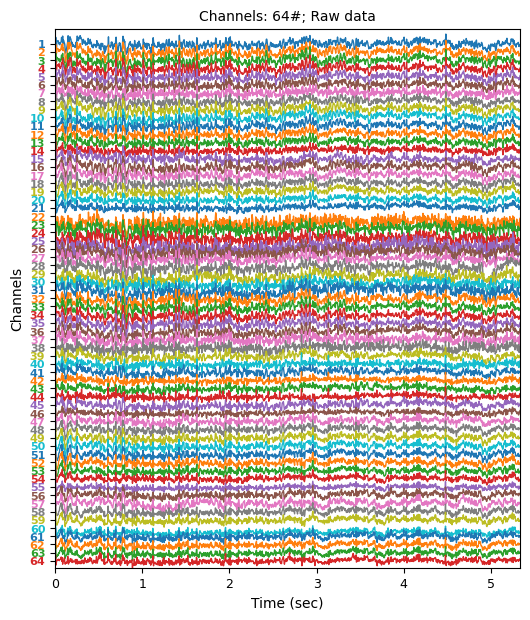

In [36]:
title = f"Raw data" # Define plot title

# Plot EEG data using the Plot_data.plot_data function
Plot_data.plot_data(signal, fs, channels_name=None, first_point=0, last_point=1280, val_ylim=2.7, size_fig=(6, 7),
                    title=title, display_figure="on")  

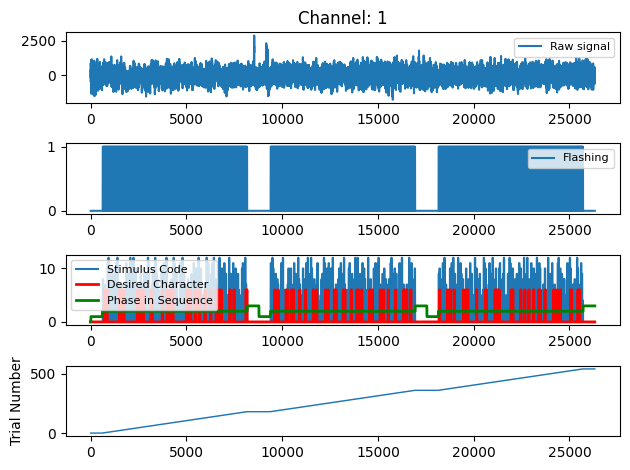

In [28]:

# Step 1: Filter trialnr
ind = np.where(trialnr <= np.max(trialnr))[0]

# Step 2: Result plot
# Plot original signal for num_channel 1
plt.subplot(4, 1, 1)
plt.plot(signal[:, 0])
plt.title('Channel: 1')
plt.legend(['Raw signal'], fontsize=8)

# Plot Flashing
plt.subplot(4, 1, 2)
plt.plot(flashing)
plt.legend(['Flashing'], fontsize=8)

# Plot StimulusCode and PhaseInSequence
plt.subplot(4, 1, 3)
plt.plot(stimulus_code)
plt.plot(np.max(stimulus_code) / 2 * stimulus_type[ind], 'r', linewidth=2)
plt.plot(phase_sequence, 'g', linewidth=2)
plt.legend(['Stimulus Code', 'Desired Character', 'Phase in Sequence'], fontsize=8)

# Plot trialnr
plt.subplot(4, 1, 4)
plt.plot(trialnr, linewidth=1)
plt.ylabel('Trial Number', fontsize=10)

plt.tight_layout()
plt.show()


**Step 3.1: Filtering (** *Filter a trial for one of the stimulation frequencies* **)**<br/>

*Input parameters:*
 - `data:` EEG data to be filtered
 - `f_low:` Lower cutoff frequency of the bandpass filter
 - `f_high:` Upper cutoff frequency of the bandpass filter
 - `order:` Filter order
 - `fs:` Sampling frequency of the EEG data (optional, if not provided, it is assumed to be fs)
 - `type_filter:` Type of filter ('low', 'high', 'bandpass', or 'bandstop') (optional, defaults to 'bandpass')
 - `filter_active:` Filter data using a specific type of filter ('low', 'high', 'bandpass', or 'bandstop') (optional, defaults to 'on')
 - `notch_freq:` Frequency to be removed from signal (Hz)
 - `quality_factor:` Quality factor for notch filter
 - `filter_active:` Whether to activate filtering ("on" or "off")
  - `notch_filter:` Whether to apply a notch filter ("on" or "off")

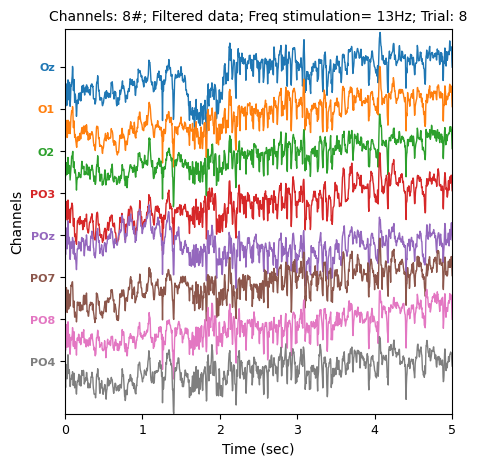

In [28]:
trial = 8            # Define trial number (trial 1 in Python index starts from 0, so trial 1 means index 0)
order = 3            # Define filter order
f_low = 0.05         # Define lower cutoff frequency for the bandpass filter (Hz)
f_high = 100         # Define upper cutoff frequency for the bandpass filter (Hz)
notch_freq = 50      # Define frequency to be removed from the signal for notch filter (Hz)
quality_factor = 20  # Define quality factor for the notch filter
notch_filter = "on"  # on or off
filter_active = "on" # on or off
type_filter = "bandpass"  # low, high, bandpass, or bandstop
freq_stim = 13       # Define stimulation frequency
title = f'Filtered data; Freq stimulation= {freq_stim}Hz; Trial: {max(1, trial)}' # Define plot title

# Apply bandpass filtering to the EEG data using the Filtering.filtering function
filtered_data = Filtering.filtering(data1, f_low, f_high, order, fs, notch_freq, quality_factor, filter_active,
                                    notch_filter, type_filter)
# Plot filtered EEG data using Plot_data.plot_data function
Plot_data.plot_data(filtered_data[:, :, max(0, trial - 1)], fs, channels_name, first_point=0, last_point=1280, 
                    val_ylim=2.7, size_fig=(5, 5), title=title, display_figure="on")

**Step 3.2: Fourier transform** **(** *FFT a channel for one of the stimulation frequencies* **)**

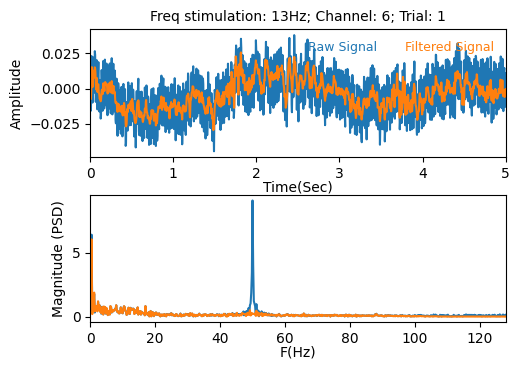

In [29]:
trial = 0          # Define trial number (trial 1 in Python index starts from 0, so trial 1 means index 0)
channel = 6        # Define channel (trial 1 in Python index starts from 0, so channel 1 means index 0)
freq_stim = 13     # Define stimulation frequency
# Define plot title
title = f"Freq stimulation: {freq_stim}Hz; Channel: {max(1, channel)}; Trial: {max(1, trial)}" 

# Perform FFT analysis on the data
FFT.fft_analysis(data1, filtered_data, fs, channel, trial, title, size_fig=[5, 3.5])

**Step 3.3: CAR filter** **(** *CAR a trial for one of the stimulation frequencies* **)**<br/>

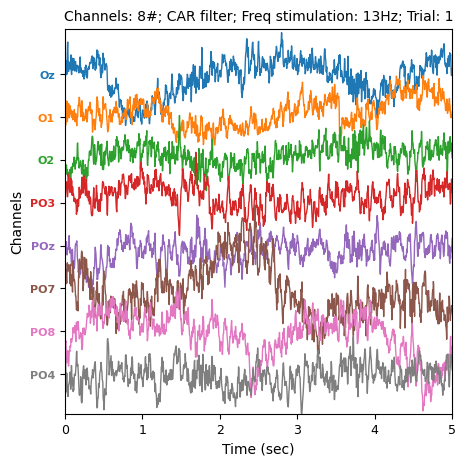

In [30]:
trial = 0          # Define trial number (trial 1 in Python index starts from 0, so trial 1 means index 0)
freq_stim = 13     # Define stimulation frequency
reference_channel = None # Define reference channel as None
title = f"CAR filter; Freq stimulation: {freq_stim}Hz; Trial: {max(1, trial)}" # Define plot title

# Apply common average reference (CAR) to the EEG data using the Common_average_reference.car function
data_car = Common_average_reference.car(filtered_data, reference_channel) 
# Plot EEG data after applying CAR filter using Plot_data.plot_data function
Plot_data.plot_data(data_car[:, :, max(0, trial - 1)], fs, channels_name, first_point=0, last_point=1280, \
                    val_ylim=2.7, size_fig=(5, 5), title=title, display_figure="on")

**Step 4.1: Power Spectral Density Analysis (PSDA)** **(** *PSDA a channel & a trial for one of the stimulation frequencies* **)**<br/>
[Article 1](https://www.researchgate.net/profile/Javier-Castillo-27/publication/263618753_Feature_Extraction_Techniques_Based_on_Power_Spectrum_for_a_SSVEP-BCI/links/5527b5a60cf29b22c9b937bd/Feature-Extraction-Techniques-Based-on-Power-Spectrum-for-a-SSVEP-BCI.pdf)<br/>
[Article 2](https://www.researchgate.net/publication/301341524_EEG_Signal_Analysis_Methods_Based_on_Steady_State_Visual_Evoked_Potential_Stimuli_for_the_Development_of_Brain_Computer_Interfaces_A_Review_Address_for_Correspondence)<br/>
$S_k = 10 \log_{10} \left( \frac{nP(f_k)}{\sum_{m=1}^{n/2} \left[P(f + mf_{res}) + P(f - mf_{res})\right]} \right)$<br/>
where `n` is the number of points near at the frequency stimulus, `P(fk)` is the power density of the stimulus frequencies and `fres `is the resolution frequency, which depends on the number of samples used in the Fourier transform. `P(fk + mfres)` and `P(fk −mfres) `are power densities around the target frequency.

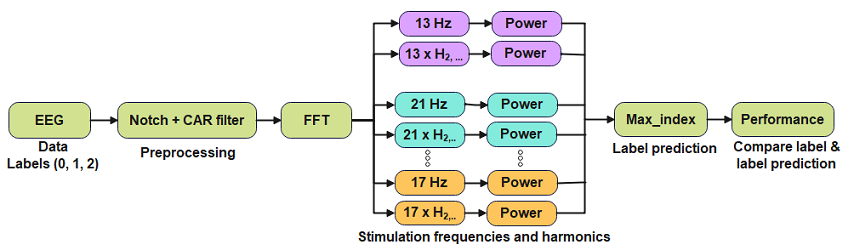

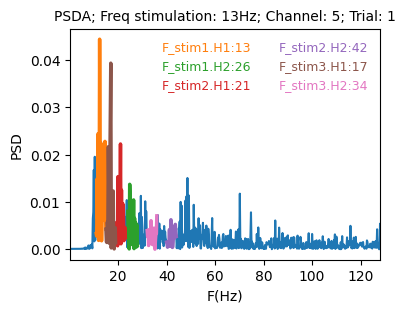

In [31]:
# ----------------------- Step 1: Filtering for one of the stimulation frequencies ---------------------------
trial = 8              # Define trial number (trial 1 in Python index starts from 0, so trial 1 means index 0)
order = 3              # Define filter order
f_low = 0.05           # Define lower cutoff frequency for the bandpass filter (Hz)
f_high = 13 - 1        # Define upper cutoff frequency for the bandpass filter (Hz) (min(f_stim) - 1)
notch_freq = 50        # Define frequency to be removed from the signal for notch filter (Hz)
quality_factor = 20    # Define quality factor for the notch filter
notch_filter = "on"    # on or off
filter_active = "on"   # on or off
type_filter = "high"   # low, high, bandpass, or bandstop

# Apply high filtering to the EEG data using the Filtering.filtering function
filtered_data = Filtering.filtering(data1, f_low, f_high, order, fs, notch_freq, quality_factor, filter_active,
                                    notch_filter, type_filter)
# --------------------------- Step 2: CAR for one of the stimulation frequencies------------------------------
data_car = Common_average_reference.car(filtered_data)
# ------------------------- Step 3: PSDA for one of the stimulation frequencies-------------------------------
trial = 0              # Define trial number (trial 1 in Python index starts from 0, so trial 1 means index 0)
channel = 5            # Define channel (trial 1 in Python index starts from 0, so channel 1 means index 0)
freq_stim = 13         # Define stimulation frequency
num_harmonic = 2       # Number of harmonic for each frequency stimulation
num_sample_neigh = 20  # Number of samples neighborhood for each frequency stimulation
f_stim = [13, 21, 17]  # Frequencies stimulation
# Define plot title
title = f"PSDA; Freq stimulation: {freq_stim}Hz; Channel: {max(1, channel)}; Trial: {max(1, trial)}" 

# Perform PSDA analysis for one of the stimulation frequencies
max_freq, label = PSDA_a_trial.psda_a_trial(data_car[:, max(0, channel - 1), max(0, trial - 1)], fs, 
                                            num_sample_neigh, f_stim, num_harmonic, title, fig_size=[4, 3])

**Step 4.2: Power Spectral Density Analysis (PSDA) for all datasets or stimulations**<br/>

In [32]:
# ----------------------------------- Step 1: Combine all of datasets ----------------------------------------
data_total = np.concatenate((data1, data2, data3), axis=2)
labels = np.concatenate((np.full(data1.shape[-1], 0), np.full(data2.shape[-1], 1), np.full(data3.shape[-1], 2)))
# -------------------------------- Step 2: Filtering for all of datasets -------------------------------------
order = 3                # Define filter order
f_low = 0.05             # Define lower cutoff frequency for the bandpass filter (Hz)
f_high = 100             # Define upper cutoff frequency for the bandpass filter (Hz)
notch_freq = 50          # Define frequency to be removed from the signal for notch filter (Hz)
quality_factor = 20      # Define quality factor for the notch filter
notch_filter = "on"      # on or off
filter_active = "off"    # on or off
type_filter = "bandpass" # low, high, bandpass, or bandstop

# Apply notch filter to the EEG data using the Filtering.filtering function
filtered_data = Filtering.filtering(data_total, f_low, f_high, order, fs, notch_freq, quality_factor, 
                                    filter_active, notch_filter, type_filter)
# ------------------------------------- Step 3: CAR for all of datasets --------------------------------------
data_car = Common_average_reference.car(filtered_data) 
# ---------------------------------- Step 4: PSDA for all of datasets ----------------------------------------
num_channel = [0, 1, 2]   # Number of Channel
num_harmonic = 2          # Number of harmonic for each frequency stimulation
num_sample_neigh = 30     # Number of samples neighborhood for each frequency stimulation
f_stim = [13, 21, 17]     # Frequencies stimulation

# Perform psda analysis for multiple channels
predict_label = PSDA.psda_analysis(data_car[:, num_channel], f_stim, num_sample_neigh, fs, num_harmonic)
# Calculate and print accuracy
print(f"Accuracy: {np.sum(labels == predict_label) / len(predict_label) * 100:.2f}") 

Accuracy: 94.79


**Step 5.1: Canonical correlation analysis (CCA) Method**<br/>
[Article 1](https://graphics.stanford.edu/courses/cs233-18-spring/ReferencedPapers/CCA_Weenik.pdf)<br/>
[Article 2](https://ieeexplore.ieee.org/abstract/document/4015614)<br/>
[Article 3](https://www.frontiersin.org/articles/10.3389/fninf.2016.00049/full)<br/>
CCA is a statistical technique used to find correlations between two sets of data (EEG signals from different channels and sinusoidal signals at the stimulation frequencies and their harmonics). It aims to identify the linear relationships between variables in each set and determine the maximum correlation between linear combinations of variables from the two sets.<br/>
Given two multidimensional variables $X \in \mathbb{R}^{m \times k}$ and $Z \in \mathbb{R}^{n \times k}$, CCA seeks a pair of weight vectors $w \in \mathbb{R}^{m \times 1}$ and $v \in \mathbb{R}^{n \times 1}$, to maximize the correlation between $x = w^TX$ and $z = v^TZ$. The optimization problem is expressed below.<br/>
$\rho = \underset{w, v}{\text{arg max}} \frac{E[xz^T]}{\sqrt{E[xx^T] E[zz^T]}} = \underset{w, v}{\text{arg max}} \frac{w^T XZ^T v}{\sqrt{w^T XX^T w w^T ZZ^T v}}$<br/>
The formula can be maximized by solving a generalized eigenvalue problem.<br/>
*`D`* be the minimal rank of $X$ and $Y_{i}$. *`D`* correlation coefficients, i.e., $\rho_1, \rho_2, \ldots, \rho_D$, for $X$ and $Y_{i}$, $i = 1, 2, \ldots, N_f$.<br/>
$\lambda = max(\rho_1, \rho_2, \ldots, \rho_D)$


`CCA step by step:`
- Step 1: Generate sine and cosine waves for the fundamental and harmonic frequencies for each stimulus frequency to create the reference signal set Y.
- Step 2: Calculate the covariance matrices (EEG & Yref) 
- Step 3: Perform singular value decomposition on the covariance matrices or the data sets.
- Step 4: Obtain the singular values and singular vectors from the decomposition.
- Step 5: Calculate the canonical correlation coefficients using the singular values.
- Step 6: Interpret the canonical correlation coefficients to understand the relationships between the variables in each set.

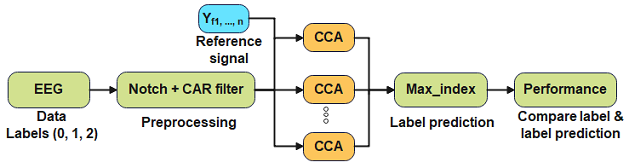

In [33]:
# ---------------------------------- Step 1: Combine all of datasets -----------------------------------------
data_total = np.concatenate((data1, data2, data3), axis=2)
labels = np.concatenate((np.full(data1.shape[-1], 0), np.full(data2.shape[-1], 1), np.full(data3.shape[-1], 2)))
# ----------------------- Step 1: Filtering for one of the stimulation frequencies ---------------------------
order = 4                # Define filter order
f_low = 0.05             # Define lower cutoff frequency for the bandpass filter (Hz)
f_high = 100             # Define upper cutoff frequency for the bandpass filter (Hz)
notch_freq = 50          # Define frequency to be removed from the signal for notch filter (Hz)
quality_factor = 20      # Define quality factor for the notch filter
notch_filter = "on"      # on or off
filter_active = "off"    # on or off
type_filter = "bandpass" # low, high, bandpass, or bandstop

# Apply notch filter to the EEG data using the Filtering.filtering function
filtered_data = Filtering.filtering(data_total, f_low, f_high, order, fs, notch_freq, quality_factor, 
                                    filter_active, notch_filter, type_filter)
# -------------------------- Step 2: CAR for one of the stimulation frequencies-------------------------------
data_car = Common_average_reference.car(filtered_data)
# ----------------------------------------- Step 3: CCA Method -----------------------------------------------
num_harmonic = 4          # Number of harmonic for each frequency stimulation
f_stim = [13, 21, 17]     # Frequencies stimulation
num_channel = [0, 1, 2]   # Number of Channel

# Perform cca analysis for multiple channels
predict_label = CCA.cca(data_car, fs, f_stim, num_channel, num_harmonic)
print(f"Accuracy: {np.sum(labels == predict_label) / len(predict_label) * 100:.2f}")

Accuracy: 92.08


**Step 5.2: Fusing Canonical Coefficients (FoCCA) method**<br/>
[Article](https://ieeexplore.ieee.org/document/8692441)<br/>
FoCCA combines correlation coefficients from CCA using a nonlinear weighting function for frequency recognition. Its goal is to enhance classification accuracy and information transfer rate compared to the standard CCA method. FoCCA retains discriminative information by combining all the correlation coefficients of CCA using a nonlinear weighting function, which may be lost in standard CCA.<br/>
$\eta = \sum_{k=0}^{D} \phi_k \cdot (\lambda_k)^2$<br/> 
$\phi_k = k^{-a} + b, \quad k = 1, 2, \ldots, D$<br/> 
$\boldsymbol{\phi} = [\phi_1 \phi_2 \ldots \phi_D]^T$<br/>
$\lambda = [\lambda_1 \lambda_2 \ldots \lambda_D]^T$<br/>
$D$ canonical coefficients in descending order, e.g. $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_D$.<br/>
$f = \max_i \, \eta(f_i)\quad\quad i = 1, 2, \ldots, N_f$<br/>

`CCA step by step:`
- Step 1: calculate the canonical coefficients using standard CCA for a test sample and the reference signal at each stimulus frequency.
- Step 2: A weighted summation method is used to combine the $D$ coefficients obtained from the CCA, with the weights denoted as "$\phi$" and the coefficients arranged in descending order.
- Step 3: The combined coefficients are used as the new feature for classification in the frequency recognition process.

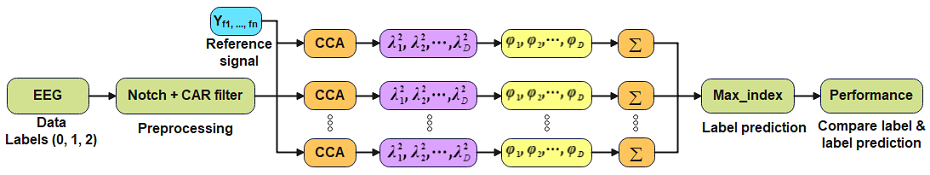

In [34]:
# ---------------------------------- Step 1: Combine all of datasets -----------------------------------------
data_total = np.concatenate((data1, data2, data3), axis=2)
labels = np.concatenate((np.full(data1.shape[-1], 0), np.full(data2.shape[-1], 1), np.full(data3.shape[-1], 2)))
# ---------------------- Step 1: Filtering for one of the stimulation frequencies ----------------------------
order = 4                # Define filter order
f_low = 0.05             # Define lower cutoff frequency for the bandpass filter (Hz)
f_high = 100             # Define upper cutoff frequency for the bandpass filter (Hz)
notch_freq = 50          # Define frequency to be removed from the signal for notch filter (Hz)
quality_factor = 20      # Define quality factor for the notch filter
notch_filter = "on"      # on or off
filter_active = "off"    # on or off
type_filter = "bandpass" # low, high, bandpass, or bandstop

# Apply notch filter to the EEG data using the Filtering.filtering function
filtered_data = Filtering.filtering(data_total, f_low, f_high, order, fs, notch_freq, quality_factor, 
                                    filter_active, notch_filter, type_filter)
# --------------------------- Step 2: CAR for one of the stimulation frequencies------------------------------
data_car = Common_average_reference.car(filtered_data)
# ------------------------------------------- Step 3: CCA Method ---------------------------------------------
num_harmonic = 2          # Number of harmonic for each frequency stimulation
f_stim = [13, 21, 17]     # Frequencies stimulation
num_channel = [0, 1, 2]   # Number of Channel          
a = [0.01, 0.1, 0, 3, 5]
b = [0.01, 0.1, 0, 1, 10]

# Perform focca analysis for multiple channels
accuracy = FoCCA.focca_analysis(data_car, labels, fs, f_stim, num_channel, num_harmonic, a, b)

0.01, 0.01 --> 94.17
0.01, 0.1 --> 94.17
0.01, 0 --> 94.17
0.01, 1 --> 94.17
0.01, 10 --> 94.17
0.1, 0.01 --> 94.17
0.1, 0.1 --> 94.17
0.1, 0 --> 94.17
0.1, 1 --> 94.17
0.1, 10 --> 94.17
0, 0.01 --> 94.17
0, 0.1 --> 94.17
0, 0 --> 94.17
0, 1 --> 94.17
0, 10 --> 94.17
3, 0.01 --> 93.54
3, 0.1 --> 93.75
3, 0 --> 93.54
3, 1 --> 94.17
3, 10 --> 94.17
5, 0.01 --> 93.54
5, 0.1 --> 93.54
5, 0 --> 93.54
5, 1 --> 93.96
5, 10 --> 94.17


**Step 5.3: Filter bank canonical correlation analysis (FBCCA) method**<br/>
[Article](https://iopscience.iop.org/article/10.1088/1741-2560/12/4/046008/ampdf)<br/>
FBCCA combines fundamental and harmonic frequency components to improve SSVEP detection by dividing the SSVEP signals into subbands with varying frequency ranges.

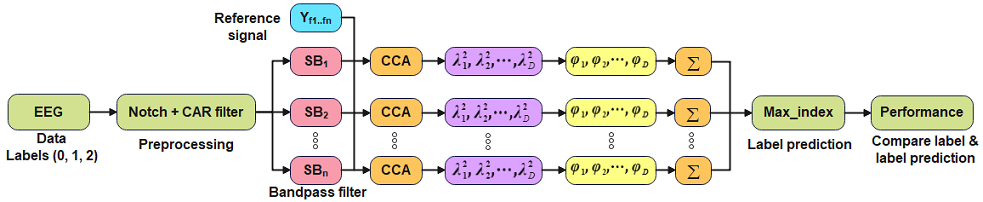

In [35]:
# ---------------------------------- Step 1: Combine all of datasets -----------------------------------------
data_total = np.concatenate((data1, data2, data3), axis=2)
labels = np.concatenate((np.full(data1.shape[-1], 0), np.full(data2.shape[-1], 1), np.full(data3.shape[-1], 2)))
# ---------------------- Step 1: Filtering for one of the stimulation frequencies ----------------------------
order = 4                # Define filter order
f_low = 0.05             # Define lower cutoff frequency for the bandpass filter (Hz)
f_high = 100             # Define upper cutoff frequency for the bandpass filter (Hz)
notch_freq = 50          # Define frequency to be removed from the signal for notch filter (Hz)
quality_factor = 20      # Define quality factor for the notch filter
notch_filter = "on"      # on or off
filter_active = "off"    # on or off
type_filter = "bandpass" # low, high, bandpass, or bandstop

# Apply notch filter to the EEG data using the Filtering.filtering function
filtered_data = Filtering.filtering(data_total, f_low, f_high, order, fs, notch_freq, quality_factor, 
                                    filter_active, notch_filter, type_filter)
# -------------------------- Step 2: CAR for one of the stimulation frequencies-------------------------------
data_car = Common_average_reference.car(filtered_data)
# ------------------------------------------ Step 3: FBCCA Method --------------------------------------------
method = 'm3'             # Type filter banks: M1, M2, M3
num_harmonic = 2          # Number of harmonic for each frequency stimulation
notch_filter = "off"      # on or off
filter_active = "on"      # on or off
type_filter = "bandpass"  # low, high, bandpass, or bandstop
f_stim = [13, 21, 17]     # Frequencies stimulation
num_channel = [0, 1]   # Number of Channel          
a = [0.01, 0]
b = [0.001, 0]
filter_banks = [[10,  20,  30,  40,  50,  60,  70,  80,  90],
 [100, 100, 100, 100, 100, 100, 100, 100, 100]]

# Perform fbcca analysis for multiple channels
FBCCA.fbcca_analysis(data_car, labels, fs, f_stim, num_channel, num_harmonic, a, b, filter_banks, order, 
                     notch_freq, quality_factor, filter_active, notch_filter, type_filter)

0.01, 0.001 --> 97.71
0.01, 0 --> 97.71
0, 0.001 --> 97.71
0, 0 --> 97.71


['97.71', '97.71', '97.71', '97.71']

**Step 5.4: Multivariate synchronization index (MSI) method**<br/>
[Article](https://www.sciencedirect.com/science/article/abs/pii/S0165027013002677)<br/>
The MSI method estimates synchronization between mixed signals and reference signals for frequency recognition. It utilizes the S-estimator, based on the entropy of normalized eigenvalues of the correlation matrix of multivariate signals.

$c = \begin{bmatrix} c_{11} & c_{12} \\ c_{21} & c_{22} \end{bmatrix} \quad  c_{11} = \frac{1}{m}xx^T  \quad  c_{22} = \frac{1}{m} yy^T \quad c_{12} = c_{21} = \frac{1}{m} xy^T$

$u = \begin{bmatrix} c_{11}^{(-1/2)} & 0 \\ 0 & c_{22}^{(-1/2)} \end{bmatrix} \quad R = ucu^T = \begin{bmatrix} I_{n \times n} & c_{11}^{(-1/2)} c_{12} c_{22}^{(-1/2)} \\ c_{22}^{(-1/2)} c_{21} c_{11}^{(-1/2)} & I_{2n_h \times 2n_h} \end{bmatrix}$

$\lambda_i = \frac{\lambda_i}{\sum_{i=1}^{p} \lambda_i} = \frac{\lambda_i}{\text{tr}(R)}\quad \quad s = 1 + \frac{\sum_{i=1}^{p} \lambda_i \log(\lambda_i)}{\log(p)}$

$x: n × m \quad  y: 2n_{h} × m$<br/>
*`n`* is the number of channels, *`m`* is the number of samples, and *`nh`* is the number of harmonics for the sine and cosine components.




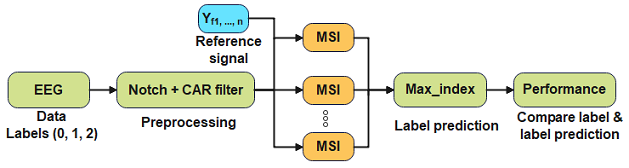

In [36]:
# ---------------------------------- Step 1: Combine all of datasets -----------------------------------------
data_total = np.concatenate((data1, data2, data3), axis=2)
labels = np.concatenate((np.full(data1.shape[-1], 0), np.full(data2.shape[-1], 1), np.full(data3.shape[-1], 2)))
# ---------------------- Step 1: Filtering for one of the stimulation frequencies ----------------------------
order = 4                # Define filter order
f_low = 0.05             # Define lower cutoff frequency for the bandpass filter (Hz)
f_high = 100             # Define upper cutoff frequency for the bandpass filter (Hz)
notch_freq = 50          # Define frequency to be removed from the signal for notch filter (Hz)
quality_factor = 20      # Define quality factor for the notch filter
notch_filter = "on"      # on or off
filter_active = "off"    # on or off
type_filter = "bandpass" # low, high, bandpass, or bandstop

# Apply notch filter to the EEG data using the Filtering.filtering function
filtered_data = Filtering.filtering(data_total, f_low, f_high, order, fs, notch_freq, quality_factor, 
                                    filter_active, notch_filter, type_filter)
# -------------------------- Step 2: CAR for one of the stimulation frequencies-------------------------------
data_car = Common_average_reference.car(filtered_data)
# ------------------------------------------ Step 3: MSI Method ----------------------------------------------
num_harmonic = 2          # Number of harmonic for each frequency stimulation
f_stim = [13, 21, 17]     # Frequencies stimulation
num_channel = [0, 1]      # Number of Channel          

# Perform msi analysis for multiple channels
predict_label = MSI.msi(data_car, fs, f_stim, num_channel, num_harmonic)
print(f"Accuracy: {np.sum(labels == predict_label) / len(predict_label) * 100:.3f}")

Accuracy: 90.625


**Step 6.1: Feature Extraction using FFT**

![FFT feature extraction.png](<attachment:FFT feature extraction.png>)
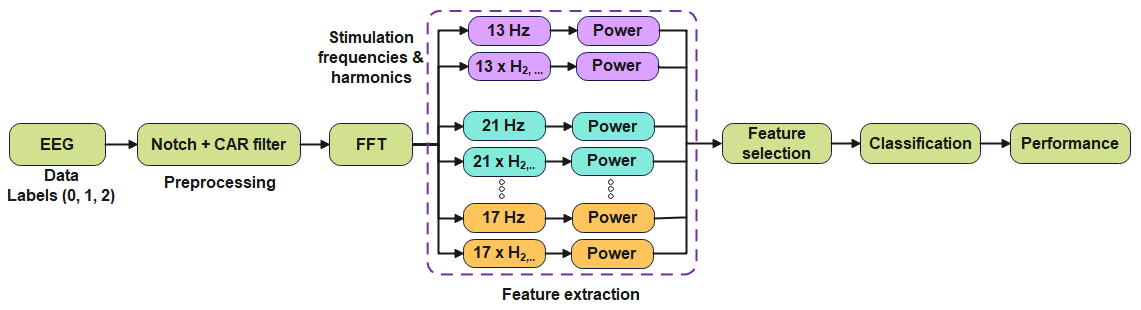

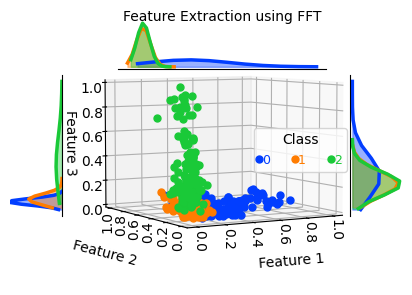

In [41]:
# ----------------------------------- Step 1: Combine all of datasets ----------------------------------------
data_total = np.concatenate((data1, data2, data3), axis=2)
labels = np.concatenate((np.full(data1.shape[-1], 0), np.full(data2.shape[-1], 1), np.full(data3.shape[-1], 2)))
# -------------------------------- Step 2: Filtering for all of datasets -------------------------------------
order = 3                # Define filter order
notch_freq = 50          # Define frequency to be removed from the signal for notch filter (Hz)
quality_factor = 20      # Define quality factor for the notch filter
subbands = [[12, 16, 20],
            [14, 18, 22]]
f_low = np.min(subbands) - 1  # Define lower cutoff frequency for the bandpass filter (Hz)
f_high = np.max(subbands) + 1 # Define upper cutoff frequency for the bandpass filter (Hz)
notch_filter = "on"       # on or off
filter_active = "on"      # on or off
type_filter = "bandpass"  # low, high, bandpass, or bandstop
# Apply notch filter to the EEG data using the Filtering.filtering function
filtered_data = Filtering.filtering(data_total, f_low, f_high, order, fs, notch_freq, quality_factor, 
                                    filter_active, notch_filter, type_filter)
# ------------------------------------- Step 3: CAR for all of datasets --------------------------------------
data_car = Common_average_reference.car(filtered_data) 
# ---------------------------------- Step 4: Feature Extraction using FFT ------------------------------------
num_channel = [0, 1]   # Number of Channel
title = f"Feature Extraction using FFT"

# Perform fft_feature_extraction analysis for multiple channels
features = FFT_Feature_Extraction.fft_feature_extraction(data_car, fs, num_channel, subbands)
Plot_features.plot_features(features, labels, title, location_legend=5, fig_size=(4, 3))

**Step 6.2: Feature Extraction using CCA**

![CCA feature extraction.png](<attachment:CCA feature extraction.png>)
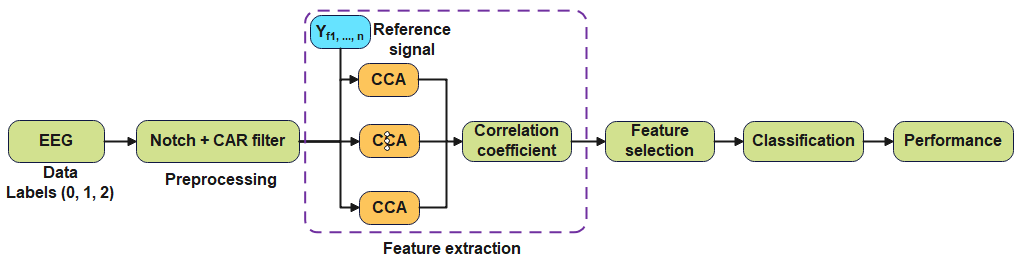

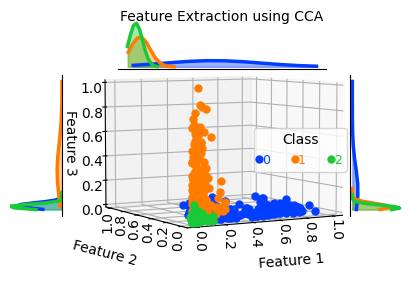

In [76]:
# ----------------------------------- Step 1: Combine all of datasets ----------------------------------------
data_total = np.concatenate((data1, data2, data3), axis=2)
labels = np.concatenate((np.full(data1.shape[-1], 0), np.full(data2.shape[-1], 1), np.full(data3.shape[-1], 2)))
# -------------------------------- Step 2: Filtering for all of datasets -------------------------------------
order = 3                # Define filter order
notch_freq = 50          # Define frequency to be removed from the signal for notch filter (Hz)
quality_factor = 20      # Define quality factor for the notch filter
subbands = [[12, 16, 20],
            [14, 18, 22]]
f_low = np.min(subbands) - 1  # Define lower cutoff frequency for the bandpass filter (Hz)
f_high = np.max(subbands) + 1 # Define upper cutoff frequency for the bandpass filter (Hz)
notch_filter = "on"       # on or off
filter_active = "on"      # on or off
type_filter = "bandpass"  # low, high, bandpass, or bandstop
# Apply notch filter to the EEG data using the Filtering.filtering function
filtered_data = Filtering.filtering(data_total, f_low, f_high, order, fs, notch_freq, quality_factor, 
                                    filter_active, notch_filter, type_filter)
# ------------------------------------- Step 3: CAR for all of datasets --------------------------------------
data_car = Common_average_reference.car(filtered_data) 
# ---------------------------------- Step 4: Feature Extraction using CCA ------------------------------------
num_harmonic = 2          # Number of harmonic for each frequency stimulation
f_stim = [13, 21, 17]     # Frequencies stimulation
num_channel = [0, 1]      # Number of Channel     
title = f"Feature Extraction using CCA"

# Perform cca_feature_extraction analysis for multiple channels
features = CCA_Feature_Extraction.cca_feature_extraction(data_car, fs, f_stim, num_channel, num_harmonic)
Plot_features.plot_features(features, labels, title, location_legend=5, fig_size=(4, 3))

In [74]:
import numpy as np
from scipy.stats import f_oneway

def anova_feature_selection(data, labels, num_features):
    """
    Perform feature selection using ANOVA.

    Inputs:
    - data: Input data matrix.
    - labels: Class labels corresponding to the data.
    - num_features: Number of features to select.

    Output:
    - features: Selected features based on ANOVA.
    """

    # -------------------------- Convert data to ndarray if it's not already ---------------------------------
    data = np.array(data) if not isinstance(data, np.ndarray) else data

    # Transpose the data if it has more than one dimension and has fewer rows than columns
    data = data.T if data.ndim > 1 and data.shape[0] < data.shape[-1] else data
    
    # Set num_features to total number of features if it exceeds
    num_features = data.shape[1] if num_features > data.shape[1] else num_features

    pvalue = np.zeros(data.shape[1])

    # Compute p-values for each feature using ANOVA
    for i in range(data.shape[1]):
        pvalue[i] = f_oneway(data[:, i], labels)[1]

    # Sort p-values and get indices of sorted features
    ind = np.argsort(pvalue)

    # Select top num_features features
    features = data[:, ind[:num_features]]

    return features


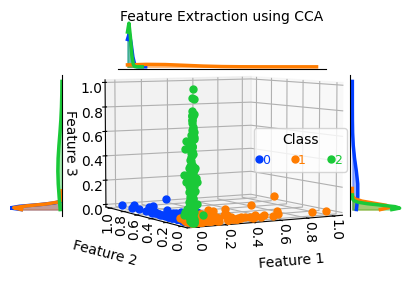

In [77]:
num_features = 4
features = anova_feature_selection(features, labels, num_features)
Plot_features.plot_features(features, labels, title, location_legend=5, fig_size=(4, 3))

Feature Selection

- Filter Methods
  - Variance (Var)
  - Fisher_score (FS)
  - Mutual information (MI)
  - Univariate feature selection (UFS)
- Wrapper Methods
  - Forward feature selection (FFS)
  - Backward feature selection (BFS)
  - Exhaustive Feature Selection (EFS)
  - Recursive feature elimination (RFE)
- Embedded Methods
  - Random forest (RF)
  - L1-based feature selection (L1)
  - Tree-based feature selection (TFS)

In [ ]:
import numpy as np
from sklearn import feature_selection, preprocessing, linear_model, ensemble, svm
# ================================================ Feature selection =====================================================
def feature_selected(data, labels, number_feature, threshold_var, n_neighbors_MI, L1_Parameter, type_feature_selection): 
    if type(data).__name__ != 'ndarray': # Convert data to ndarray if it's not already
        data = np.array(data)
    if data.ndim > 1 and data.shape[0] < data.shape[1]: # Transpose data if it has more columns than rows
        data = data.T 
    # ----------------------------------- Filter Methods --------------------------------------------------------------
    if type_feature_selection == "Var" or "var":             # Variance
      mod = feature_selection.VarianceThreshold(threshold=threshold_var)
      mod.fit(data)
      data = mod.transform(data)
    elif type_feature_selection == "MI" or "mi":                 # Mutual information
      mod = feature_selection.mutual_info_classif(data, labels, n_neighbors=n_neighbors_MI)
      data = data[:, np.argsort(mod)[-number_feature:]]
    elif type_feature_selection == "UFS" or "ufs":                # Univariate feature selection
      scaler = preprocessing.MinMaxScaler()             # Perform Min-Max scaling
      data = scaler.fit_transform(data)
      mod = feature_selection.SelectKBest(feature_selection.chi2, k=number_feature)
      data = mod.fit_transform(data, labels)
   # elif type_feature_selection == 'FS':               # Fisher_score
   #    mod = fisher_score.fisher_score(data, labels)
   #    data = data[:, mod[-number_feature:]]
   # ----------------------------------- Wrapper Methods --------------------------------------------------------------
    elif type_feature_selection == "RFE" or "rfe":                # Recursive feature elimination
      mod = feature_selection.RFE(estimator=linear_model.LogisticRegression(max_iter=1000), n_features_to_select=number_feature)
      mod.fit(data, labels)
      data = mod.transform(data)
   # elif type_feature_selection == 'FFS':              # Forward feature selection
   #    mod = linear_model.LogisticRegression(max_iter=1000)
   #    mod = SequentialFeatureSelector(mod, k_features=number_feature, forward=True, cv=5, scoring='accuracy')
   #    mod.fit(data, labels)
   #    data = data[:, mod.k_feature_idx_]              # Optimal number of feature
   # elif type_feature_selection == 'EFS':              # Exhaustive Feature Selection
   #         mod = ExhaustiveFeatureSelector(estimator=linear_model.LogisticRegression(max_iter=1000), min_features=1, max_features=number_feature, scoring='accuracy', cv=3)
   #         mod.fit(data, labels)
   #         data = data[:, mod.best_idx_]
   # elif type_feature_selection == 'FFS':              # Forward feature selection
   #    mod = linear_model.LogisticRegression(max_iter=1000)
   #    mod = SequentialFeatureSelector(mod, k_features=number_feature, forward=True, cv=5, scoring='accuracy')
   #    mod.fit(input_data, labels)
   #    data = input_data[:, mod.k_feature_idx_]        # Optimal number of feature
   # ----------------------------------- Embedded Methods --------------------------------------------------------------
    elif type_feature_selection == "RF" or "rf":                 # Random forest
      mod = ensemble.RandomForestClassifier(n_estimators=10, random_state=0)
      mod.fit(data, labels)
      data = data[:, np.argsort(mod.feature_importances_)[-number_feature:]]
    elif type_feature_selection == "L1FS" or "l1fs":               # L1-based feature selection; The smaller C the fewer feature selected
      mod = svm.LinearSVC(C=L1_Parameter, penalty='l1', dual=False, max_iter=1000).fit(data, labels)
      mod = feature_selection.SelectFromModel(mod, prefit=True)
      data = mod.transform(data)
    elif type_feature_selection == "TFS" or "tfs":                # Tree-based feature selection
      mod = ensemble.ExtraTreesClassifier(n_estimators=100)
      mod.fit(data, labels)
      data = data[:, np.argsort(mod.feature_importances_)[-number_feature:]]

    return data